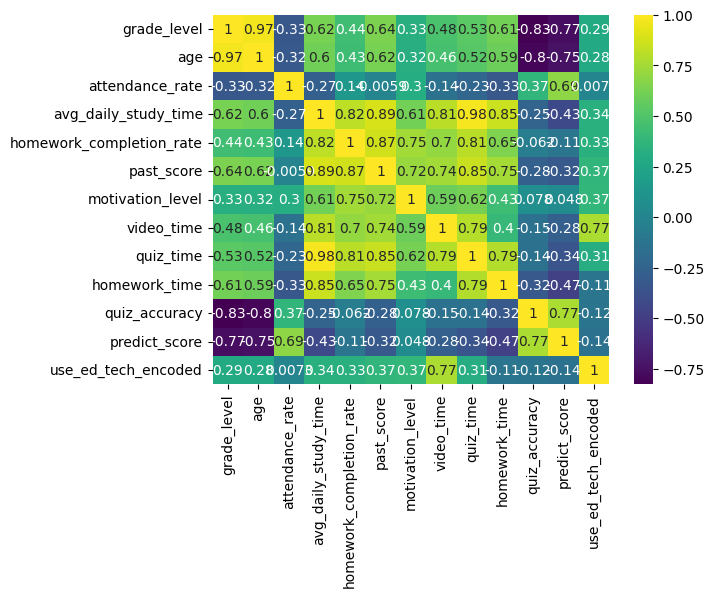

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cor=numeric_cols.corr()
sns.heatmap(cor,annot=True,cmap="viridis")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799727 entries, 0 to 999998
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   student_id                799727 non-null  object 
 1   grade_level               799727 non-null  int64  
 2   age                       799727 non-null  int64  
 3   gender                    799727 non-null  object 
 4   attendance_rate           799727 non-null  float64
 5   avg_daily_study_time      799727 non-null  float64
 6   homework_completion_rate  799727 non-null  float64
 7   past_score                799727 non-null  float64
 8   motivation_level          799727 non-null  int64  
 9   use_ed_tech               799727 non-null  int64  
 10  video_time                799727 non-null  float64
 11  quiz_time                 799727 non-null  float64
 12  homework_time             799727 non-null  float64
 13  preferred_learning_style  799727 non-null  object

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataframe
df=pd.read_csv("/content/synthetic_student_data_final.csv")

# Filter grade level
df=df[df['grade_level']>=6]

# Map 'use_ed_tech' to numerical values
df['use_ed_tech'] = df['use_ed_tech'].map({'Yes': 1, 'No': 0})

# Convert minutes to hours
df['quiz_time']      = df['quiz_time'] / 60
df['homework_time']  = df['homework_time'] / 60
df['video_time']     = df['video_time'] / 60

# Convert 'pass_fail' to numerical (e.g., 1 for 'Pass', 0 for 'Fail')
df['pass_fail_encoded'] = df['pass_fail'].map({'Pass': 1, 'Fail': 0})

# Convert 'dropout_risk' to numerical (e.g., 1 for True, 0 for False)
df['dropout_risk_encoded'] = df['dropout_risk'].astype(int)

# Select all numerical columns into a new variable
numerical_df = df.select_dtypes(include=['number'])

# Define the specific features for VIF calculation
selected_features = [
    'grade_level', 'attendance_rate', 'avg_daily_study_time',
    'homework_completion_rate', 'past_score', 'motivation_level',
    'use_ed_tech', 'quiz_accuracy'
]
numerical_df_for_vif = numerical_df[selected_features]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_df_for_vif.columns
# Calculate VIF, handling potential infinite values
vif_data["VIF"] = [
    variance_inflation_factor(numerical_df_for_vif.values, i) if np.isfinite(variance_inflation_factor(numerical_df_for_vif.values, i)) else np.inf
    for i in range(len(numerical_df_for_vif.columns))
]

print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
                    feature         VIF
0               grade_level   33.343714
1           attendance_rate  199.192754
2      avg_daily_study_time   76.858797
3  homework_completion_rate  241.821243
4                past_score  230.700785
5          motivation_level   39.315636
6               use_ed_tech    3.952931
7             quiz_accuracy  109.406673


In [ ]:
# Convert 'pass_fail' to numerical (e.g., 1 for 'Pass', 0 for 'Fail')
df['pass_fail_encoded'] = df['pass_fail'].map({'Pass': 1, 'Fail': 0})

# Convert 'dropout_risk' to numerical (e.g., 1 for True, 0 for False)
df['dropout_risk_encoded'] = df['dropout_risk'].astype(int)

# Select all numerical columns into a new variable
numerical_df = df.select_dtypes(include=['number'])

print("DataFrame with new encoded columns:")
display(df.head())
print("\nDataFrame containing only numerical columns:")
display(numerical_df.head())

DataFrame with new encoded columns:


,student_id,grade_level,age,gender,attendance_rate,avg_daily_study_time,homework_completion_rate,past_score,motivation_level,use_ed_tech,video_time,quiz_time,homework_time,preferred_learning_style,quiz_accuracy,predict_score,pass_fail,dropout_risk,pass_fail_encoded,dropout_risk_encoded
0,STD001,11,16,Male,69.70,3.66,56.37,74.45,3,1,1.050000,1.316667,1.283333,Kinesthetic,64.90,48.03,Fail,False,0,0
1,STD002,7,13,Female,79.82,2.89,56.10,65.49,3,1,1.100000,1.250000,0.533333,Kinesthetic,72.96,58.46,Fail,False,0,0
4,STD005,7,13,Male,83.95,1.81,43.94,46.48,2,0,0.283333,0.650000,0.866667,Reading/Writing,71.79,65.45,Pass,False,1,0
5,STD006,7,13,Male,100.00,1.93,47.17,62.92,3,0,0.266667,0.716667,0.933333,Reading/Writing,70.16,66.26,Pass,False,1,0
7,STD008,9,14,Other,72.17,4.45,67.55,92.29,3,1,1.266667,1.566667,1.616667,Reading/Writing,66.84,58.00,Fail,False,0,0



DataFrame containing only numerical columns:


,grade_level,age,attendance_rate,avg_daily_study_time,homework_completion_rate,past_score,motivation_level,use_ed_tech,video_time,quiz_time,homework_time,quiz_accuracy,predict_score,pass_fail_encoded,dropout_risk_encoded
0,11,16,69.70,3.66,56.37,74.45,3,1,1.050000,1.316667,1.283333,64.90,48.03,0,0
1,7,13,79.82,2.89,56.10,65.49,3,1,1.100000,1.250000,0.533333,72.96,58.46,0,0
4,7,13,83.95,1.81,43.94,46.48,2,0,0.283333,0.650000,0.866667,71.79,65.45,1,0
5,7,13,100.00,1.93,47.17,62.92,3,0,0.266667,0.716667,0.933333,70.16,66.26,1,0
7,9,14,72.17,4.45,67.55,92.29,3,1,1.266667,1.566667,1.616667,66.84,58.00,0,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Load your data
df = pd.read_csv('/content/synthetic_student_data_final.csv', on_bad_lines='skip')

# Convert 'use_ed_tech' to numerical
df['use_ed_tech'] = df['use_ed_tech'].map({'Yes': 1, 'No': 0})

# Define initial feature set and targets
features = ['grade_level', 'attendance_rate', 'avg_daily_study_time',
            'homework_completion_rate', 'past_score', 'motivation_level',
            'use_ed_tech', 'quiz_accuracy']
X = df[features]
y_score = df['predict_score']
df['pass_fail'] = df['pass_fail'].map({'Pass': 1, 'Fail': 0})

# Convert 'dropout_risk' to boolean first, coercing errors to NaN, then fill NaNs and convert to int
df['dropout_risk'] = pd.to_numeric(df['dropout_risk'], errors='coerce').fillna(0).astype(int)


y_pass_fail = df['pass_fail']
y_dropout_risk = df['dropout_risk']

# Split data into train and test sets
X_train_full, X_test_full, y_train_score_full, y_test_score_full, y_train_pass_full, y_test_pass_full, y_train_dropout_full, y_test_dropout_full = \
    train_test_split(X, y_score, y_pass_fail, y_dropout_risk, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test_full)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Number of components selected: {X_train_pca.shape[1]}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_.sum():.4f}")

# Define models and parameter grids for GridSearchCV
ridge_pipe = Pipeline([('ridge', Ridge())])
ridge_param_grid = {'ridge__alpha': [0.1, 1, 10, 100]}

logreg_pipe = Pipeline([('logreg', LogisticRegression(solver='liblinear', max_iter=1000))])
logreg_param_grid = {'logreg__C': [0.1, 1, 10, 100], 'logreg__class_weight': ['balanced', None]}

# K-fold CV setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 1. Score Prediction Model (Ridge with GridSearchCV)
grid_search_ridge = GridSearchCV(ridge_pipe, ridge_param_grid, cv=kf, scoring='r2')
grid_search_ridge.fit(X_train_pca, y_train_score_full)

best_ridge = grid_search_ridge.best_estimator_
print(f"Best Ridge alpha: {grid_search_ridge.best_params_['ridge__alpha']}")
print(f"Best Ridge CV score: {grid_search_ridge.best_score_:.4f}")

def evaluate_reg(model, X, y, name):
    preds = model.predict(X)
    preds = np.clip(preds, 0, 100)
    mae = mean_absolute_error(y, preds)
    mse = mean_squared_error(y, preds)
    rmse = np.sqrt(mse) # Calculate RMSE
    r2 = r2_score(y, preds)
    print(f"{name} Evaluation:")
    print(f"  MAE: {mae:.2f}")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}") # Use RMSE here
    print(f"  R2: {r2:.2f}")
    return preds

train_preds_score = evaluate_reg(best_ridge, X_train_pca, y_train_score_full, "Train Score")
test_preds_score = evaluate_reg(best_ridge, X_test_pca, y_test_score_full, "Test Score")

# 2. Pass/Fail Prediction (Logistic Regression with GridSearchCV and Calibration)
grid_search_pass = GridSearchCV(logreg_pipe, logreg_param_grid, cv=kf, scoring='f1')
grid_search_pass.fit(X_train_pca, y_train_pass_full)

best_logreg_pass = grid_search_pass.best_estimator_
calibrated_pass = CalibratedClassifierCV(best_logreg_pass, method='sigmoid', cv=5)
calibrated_pass.fit(X_train_pca, y_train_pass_full)

y_pred_pass = calibrated_pass.predict(X_test_pca)
y_prob_pass = calibrated_pass.predict_proba(X_test_pca)[:, 1]
print("Pass/Fail Classification Report:\n", classification_report(y_test_pass_full, y_pred_pass))

# Consistency Check
derived_pass = np.where(test_preds_score >= 60, 1, 0)
consistent_pass = np.where(y_prob_pass > 0.7, y_pred_pass, derived_pass)
print("Consistent Pass/Fail Accuracy:", (consistent_pass == y_test_pass_full).mean())

# 3. Dropout Risk Prediction (Logistic Regression with GridSearchCV and Calibration)
grid_search_dropout = GridSearchCV(logreg_pipe, logreg_param_grid, cv=kf, scoring='f1')
grid_search_dropout.fit(X_train_pca, y_train_dropout_full)

best_logreg_dropout = grid_search_dropout.best_estimator_
calibrated_dropout = CalibratedClassifierCV(best_logreg_dropout, method='sigmoid', cv=5)
calibrated_dropout.fit(X_train_pca, y_train_dropout_full)

y_pred_dropout = calibrated_dropout.predict(X_test_pca)
print("Dropout Risk Classification Report:\n", classification_report(y_test_dropout_full, y_pred_dropout))

# Save models
import joblib
joblib.dump(best_ridge, 'ridge_model_pca.pkl')
joblib.dump(calibrated_pass, 'pass_fail_model_pca.pkl')
joblib.dump(calibrated_dropout, 'dropout_risk_model_pca.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca.pkl')

Number of components selected: 5
Explained variance ratio: 0.9729
Best Ridge alpha: 1
Best Ridge CV score: 0.8948
Train Score Evaluation:
  MAE: 2.43
  MSE: 9.29
  RMSE: 3.05
  R2: 0.89
Test Score Evaluation:
  MAE: 2.44
  MSE: 9.33
  RMSE: 3.06
  R2: 0.89
Pass/Fail Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89     91570
           1       0.90      0.91      0.91    108430

    accuracy                           0.90    200000
   macro avg       0.90      0.90      0.90    200000
weighted avg       0.90      0.90      0.90    200000

Consistent Pass/Fail Accuracy: 0.86016
Dropout Risk Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97    157403
           1       0.90      0.88      0.89     42597

    accuracy                           0.95    200000
   macro avg       0.93      0.93      0.93    200000
weighted avg       0.95      0.95 

['pca.pkl']

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Load saved models and transformers
ridge = joblib.load('ridge_model_pca.pkl')
calibrated_pass = joblib.load('pass_fail_model_pca.pkl')
calibrated_dropout = joblib.load('dropout_risk_model_pca.pkl')
scaler = joblib.load('scaler.pkl')
pca = joblib.load('pca.pkl') # Corrected filename here


# Load test data (replace with your test set file or use X_test_scaled from training)
df_test = pd.read_csv('/content/synthetic_student_data_final.csv')  # Replace with actual test file

# Map 'use_ed_tech' to numerical values in the test data
df_test['use_ed_tech'] = df_test['use_ed_tech'].map({'Yes': 1, 'No': 0})

features = ['grade_level', 'attendance_rate', 'avg_daily_study_time',
            'homework_completion_rate', 'past_score', 'motivation_level',
            'use_ed_tech', 'quiz_accuracy']
X_test = df_test[features]
y_test_score = df_test['predict_score']

# Map 'pass_fail' to numerical values in the test data before converting to int
df_test['pass_fail'] = df_test['pass_fail'].map({'Pass': 1, 'Fail': 0})
y_test_pass = df_test['pass_fail'].astype(int)

y_test_dropout = df_test['dropout_risk'].astype(int)


# Preprocess test data using the *fitted* scaler and pca from training
# It's crucial to use the scaler and PCA fitted on the *training* data
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)


# Predict
test_preds_score = ridge.predict(X_test_pca)
test_preds_pass = calibrated_pass.predict(X_test_pca)
test_prob_pass = calibrated_pass.predict_proba(X_test_pca)[:, 1]
test_preds_dropout = calibrated_dropout.predict(X_test_pca)

# Evaluate consistency
derived_pass = np.where(test_preds_score >= 60, 1, 0)
consistent_pass = np.where(test_prob_pass > 0.7, test_preds_pass, derived_pass)
consistency_accuracy = np.mean(consistent_pass == y_test_pass)
print(f"Overall Consistency Accuracy: {consistency_accuracy:.4f}")

# Check for contradictions
contradictions = np.sum((test_preds_score >= 60) & (test_preds_pass == 0))
total_high_scores = np.sum(test_preds_score >= 60)
contradiction_rate = contradictions / total_high_scores if total_high_scores > 0 else 0
print(f"Number of Contradictions (Score ≥ 60, Predicted Fail): {contradictions}")
print(f"Total High Scores (≥ 60): {total_high_scores}")
print(f"Contradiction Rate: {contradiction_rate:.4f}")

# Detailed contradiction analysis (optional)
contradiction_indices = np.where((test_preds_score >= 60) & (test_preds_pass == 0))[0]
if len(contradiction_indices) > 0:
    print("\nSample Contradictory Cases:")
    for idx in contradiction_indices[:5]:  # Show top 5 examples
        print(f"Index: {idx}, Predicted Score: {test_preds_score[idx]:.2f}, Pass/Fail: {test_preds_pass[idx]}, "
              f"Pass Probability: {test_prob_pass[idx]:.2f}, True Pass/Fail: {y_test_pass.iloc[idx]}")

# Save predictions for further analysis
df_test['predicted_score'] = test_preds_score
df_test['predicted_pass_fail'] = test_preds_pass
df_test['pass_probability'] = test_prob_pass
df_test['predicted_dropout_risk'] = test_preds_dropout
df_test.to_csv('test_predictions.csv', index=False)

Overall Consistency Accuracy: 0.8597
Number of Contradictions (Score ≥ 60, Predicted Fail): 115501
Total High Scores (≥ 60): 661667
Contradiction Rate: 0.1746

Sample Contradictory Cases:
Index: 14, Predicted Score: 60.14, Pass/Fail: 0, Pass Probability: 0.17, True Pass/Fail: 0
Index: 18, Predicted Score: 62.17, Pass/Fail: 0, Pass Probability: 0.38, True Pass/Fail: 1
Index: 20, Predicted Score: 60.35, Pass/Fail: 0, Pass Probability: 0.19, True Pass/Fail: 0
Index: 35, Predicted Score: 61.01, Pass/Fail: 0, Pass Probability: 0.26, True Pass/Fail: 1
Index: 41, Predicted Score: 60.19, Pass/Fail: 0, Pass Probability: 0.16, True Pass/Fail: 0
